In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# problem 1(a)
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = X[:, np.newaxis]
Y = data[:,1]
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

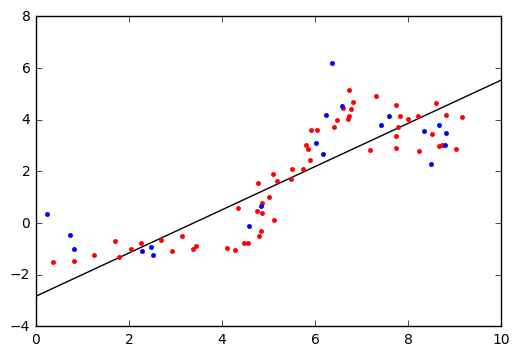

In [2]:
# problem 1(b)
lr = ml.linear.linearRegress(Xtr, Ytr);
xs = np.linspace(0, 10, 200);
xs = xs[:, np.newaxis]
ys = lr.predict(xs);
plt.plot(xs, ys, 'k-', Xtr, Ytr, 'r.', Xte, Yte, 'b.')
plt.show()

In [3]:
print(lr.theta)

[[-2.82765049  0.83606916]]


In [4]:
print(lr.mse(Xtr, Ytr))
print(lr.mse(Xte, Yte))

1.12771195561
2.24234920301


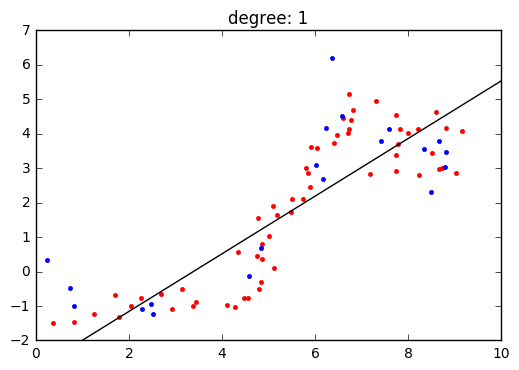

In [5]:
# problem 1(c)
degree=1
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 1")
plt.show()

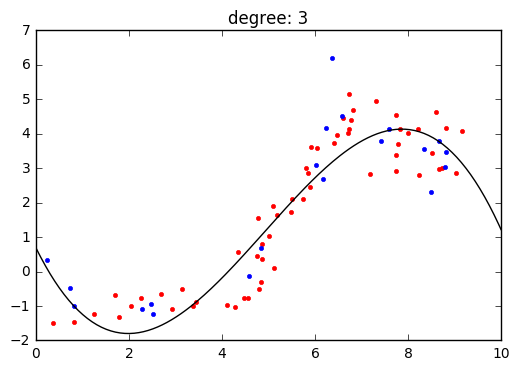

In [6]:
degree=3
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 3")
plt.show()

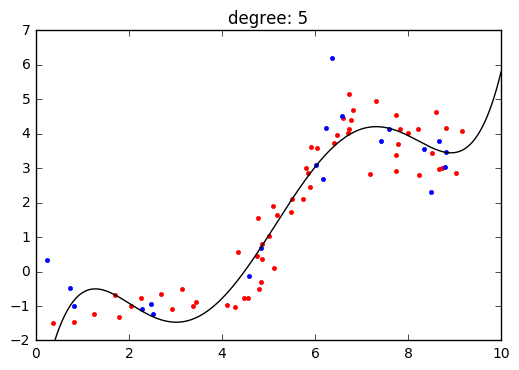

In [7]:
degree=5
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 5")
plt.show()

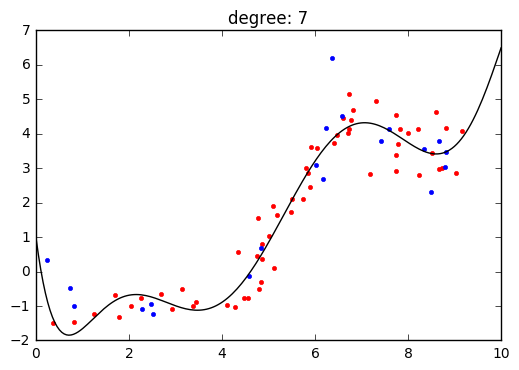

In [8]:
degree=7
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 7")
plt.show()

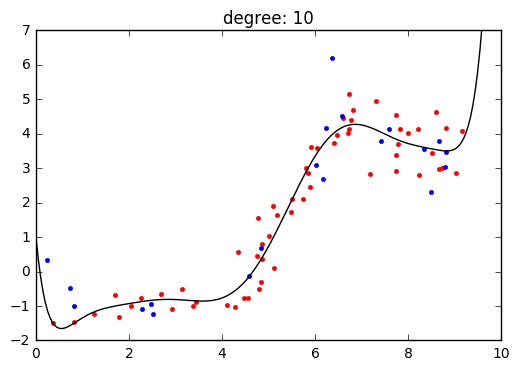

In [9]:
degree=10
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 10")
plt.show()

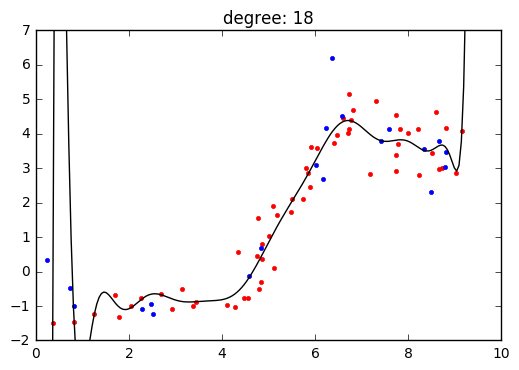

In [10]:
degree=18
XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
XtrP, params = ml.transforms.rescale(XtrP)
lr = ml.linear.linearRegress(XtrP, Ytr)
XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False), params)[0]
Yhat_xs = lr.predict(Phi(xs))

plt.plot(Xtr, Ytr, 'r.', Xte, Yte, 'b.')
ax = plt.axis();
plt.plot(xs, Yhat_xs, 'k-');
plt.axis(ax);

plt.title("degree: 18")
plt.show()

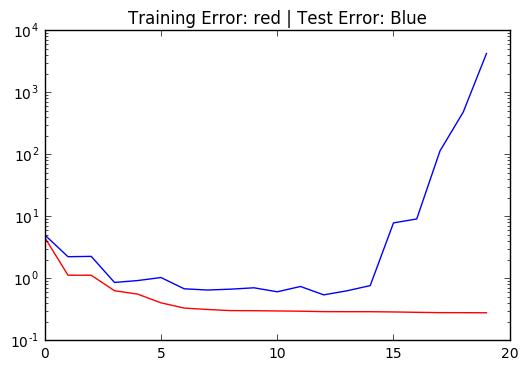

In [11]:
degrees = np.array(range(0,20))
errTrain = np.zeros((20,))
errTest  = np.zeros((20,))

for i in degrees:
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
    XtrP, params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP, _ = ml.transforms.rescale(ml.transforms.fpoly(Xte,i,False),params)
    Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,i,False), params)[0]
    
    errTrain[i] = lr.mse(Phi(Xtr), Ytr)
    errTest[i] = lr.mse(Phi(Xte), Yte)

plt.semilogy(degrees, errTrain, 'red')
plt.semilogy(degrees, errTest, 'blue')
plt.title("Training Error: red | Test Error: Blue")
plt.show()
    

30855.972797


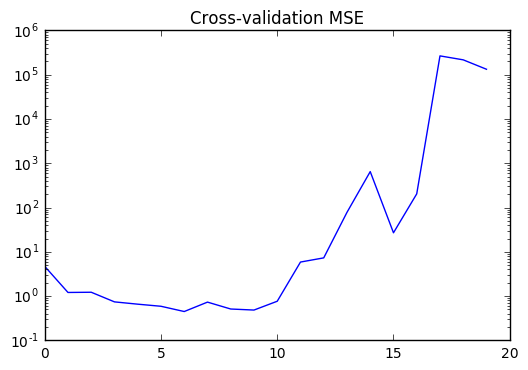

In [12]:
# problem 2
nFolds = 5
J = np.zeros((20,nFolds))

for i in degrees:
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold)
        
        XtiP = ml.transforms.fpoly(Xti, i, bias=False)
        XtiP, params = ml.transforms.rescale(XtiP)
        Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,i,False), params)[0]
        
        lr = ml.linear.linearRegress(Phi(Xti), Yti)
        J[i,iFold] = lr.mse(Phi(Xvi), Yvi)

print(np.mean(J))
J = np.mean(J, axis=1)
plt.semilogy(degrees, J)
plt.title("Cross-validation MSE")
plt.show()

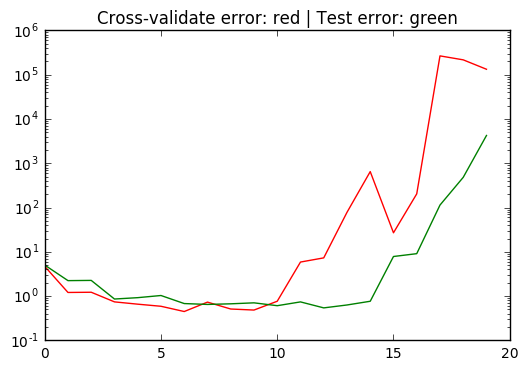

In [15]:
plt.semilogy(degrees, J, 'red', degrees, errTest, 'green')
plt.title('Cross-validate error: red | Test error: green')
plt.show()